In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"punitpawar","key":"59e824c52c9ebf9460dad1b2b64c0f2e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
 99% 3.43G/3.47G [00:36<00:00, 198MB/s]
100% 3.47G/3.47G [00:36<00:00, 101MB/s]


In [ ]:
!unzip fruits.zip -d fruits360

Streaming output truncated to the last 5000 lines.
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_277.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_281.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_285.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_289.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_29.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_33.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_37.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_41.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_45.jpg  


In [ ]:
!ls fruits360/fruits-360_original-size/fruits-360-original-size/Training/
!ls fruits360/fruits-360_original-size/fruits-360-original-size/Validation/

'Apple 10'	       'Avocado Black 1'	    'Cucumber 4'
'Apple 11'	       'Avocado Green 1'	    'Cucumber 5'
'Apple 12'	       'Banana 3'		    'Cucumber 7'
'Apple 13'	       'Banana 4'		    'Cucumber 9'
'Apple 14'	       'Beans 1'		     eggplant_long_1
'Apple 17'	       'Blackberrie 1'		    'Gooseberry 1'
'Apple 18'	       'Blackberrie 2'		    'Nut 1'
'Apple 19'	       'Blackberrie half rippen 1'  'Nut 2'
'Apple 5'	       'Blackberrie not rippen 1'   'Nut 3'
 apple_6	       'Cabbage red 1'		    'Nut 4'
'Apple 7'	        cabbage_white_1		    'Nut 5'
'Apple 8'	       'Cactus fruit green 1'	     pear_1
'Apple 9'	       'Cactus fruit red 1'	     pear_3
 apple_braeburn_1      'Caju seed 1'		    'Pistachio 1'
'Apple Core 1'	        carrot_1		    'Quince 2'
 apple_crimson_snow_1  'Cherimoya 1'		    'Quince 3'
 apple_golden_1        'Cherry 3'		    'Quince 4'
 apple_golden_2        'Cherry 4'		    'Tomato 1'
 apple_golden_3        'Cherry 5'		    'Tomato 10'
 apple_granny_smith_1  'Cherry Rainier

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:

IMG_SIZE = (100,100)
BATCH_SIZE = 32
train_dir = 'fruits360/fruits-360_original-size/fruits-360-original-size/Training/'
val_dir = 'fruits360/fruits-360_original-size/fruits-360-original-size/Test/'

In [ ]:
train_gen = ImageDataGenerator(rescale = 1./255)
val_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = IMG_SIZE,
                                           batch_size = BATCH_SIZE,
                                           class_mode = 'categorical')

Found 29222 images belonging to 90 classes.


In [ ]:
val_data = val_gen.flow_from_directory(val_dir,
                                           target_size = IMG_SIZE,
                                           batch_size = BATCH_SIZE,
                                           class_mode = 'categorical')

Found 14527 images belonging to 90 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_data.num_classes, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    validation_data = val_data,
    epochs = 5
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 95s 98ms/step - accuracy: 0.5516 - loss: 1.7743 - val_accuracy: 0.9636 - val_loss: 0.1111
Epoch 2/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9508 - loss: 0.1426 - val_accuracy: 0.9749 - val_loss: 0.0602
Epoch 3/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 74s 81ms/step - accuracy: 0.9698 - loss: 0.0911 - val_accuracy: 0.9746 - val_loss: 0.0787
Epoch 4/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 74s 81ms/step - accuracy: 0.9760 - loss: 0.0776 - val_accuracy: 0.9958 - val_loss: 0.0121
Epoch 5/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 73s 80ms/step - accuracy: 0.9780 - loss: 0.0681 - val_accuracy: 0.9983 - val_loss: 0.0058


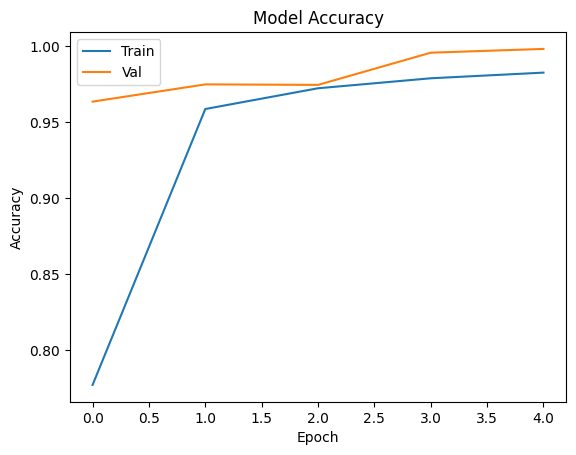

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

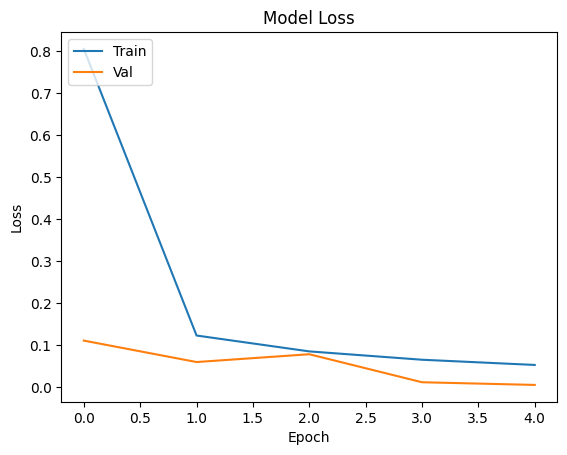

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apple.jpg to apple.jpg


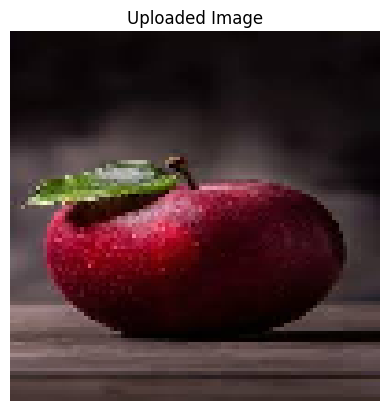

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

image_path = list(uploaded.keys())[0]
img = load_img(image_path, target_size =(100,100))
plt.imshow(img)
plt.axis('off')
plt.title('Uploaded Image')
plt.show()

In [ ]:
import numpy as np
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
pred = model.predict(img_array)
pred_class_index = np.argmax(pred)
# Access the correct attribute 'class_indices'
pred_class_label = list(train_data.class_indices.keys())[pred_class_index]

print("Predicted class = ", pred_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
Predicted class =  apple_red_delicios_1
